## **드라이브 마운트**
---

In [ ]:
# mount google drive 

import os, sys 
from google.colab import drive

drive.mount('/content/gdrive')
%cd /content/gdrive/MyDrive/가사유사도기반추천

Mounted at /content/gdrive
/content/gdrive/MyDrive/가사유사도기반추천


In [ ]:
!nvidia-smi

Sun Feb 28 13:36:05 2021       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 460.39       Driver Version: 460.32.03    CUDA Version: 11.2     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   67C    P8    11W /  70W |      0MiB / 15109MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

## **결과 파일**
-----------------------
- Pororo 요약 결과 파일: summarize_ko.csv
- Pororo 에러 난 데이터 제외 파일(요약X): remove_error.csv


## **준비 과정 및 요약**
---
- pororo is based on torch=1.6(cuda 10.1) and python>=3.6
- pytorch 1.6으로 재설치 및 pororo 설치

In [ ]:
!pip install torch==1.6.0+cu101 torchvision==0.7.0+cu101 -f https://download.pytorch.org/whl/torch_stable.html

Looking in links: https://download.pytorch.org/whl/torch_stable.html
     |████████████████████████████████| 708.0MB 27kB/s 
     |████████████████████████████████| 5.9MB 38.4MB/s 
  Found existing installation: torch 1.7.1+cu101
    Uninstalling torch-1.7.1+cu101:
      Successfully uninstalled torch-1.7.1+cu101
  Found existing installation: torchvision 0.8.2+cu101
    Uninstalling torchvision-0.8.2+cu101:
      Successfully uninstalled torchvision-0.8.2+cu101


In [ ]:
import torch

torch.__version__

'1.6.0+cu101'

In [ ]:
!pip install pororo

     |████████████████████████████████| 266kB 14.6MB/s 
     |████████████████████████████████| 71kB 11.3MB/s 
     |████████████████████████████████| 3.1MB 57.8MB/s 
     |████████████████████████████████| 1.9MB 45.8MB/s 
     |████████████████████████████████| 71kB 11.9MB/s 
     |████████████████████████████████| 1.4MB 44.4MB/s 
     |████████████████████████████████| 276kB 46.2MB/s 
     |████████████████████████████████| 1.7MB 48.1MB/s 
     |████████████████████████████████| 471kB 49.8MB/s 
     |████████████████████████████████| 184kB 58.5MB/s 
     |████████████████████████████████| 3.2MB 50.9MB/s 
     |████████████████████████████████| 890kB 52.9MB/s 
     |████████████████████████████████| 1.2MB 53.8MB/s 
     |████████████████████████████████| 71kB 10.9MB/s 
     |████████████████████████████████| 133kB 60.2MB/s 
     |████████████████████████████████| 112kB 47.2MB/s 
     |████████████████████████████████| 645kB 52.0MB/s 
  Created wheel for wget: filename=wget-3.2-cp37-no

In [ ]:
from pororo import Pororo
import pandas as pd

In [ ]:
Pororo.available_tasks()

"Available tasks are ['mrc', 'rc', 'qa', 'question_answering', 'machine_reading_comprehension', 'reading_comprehension', 'sentiment', 'sentiment_analysis', 'nli', 'natural_language_inference', 'inference', 'fill', 'fill_in_blank', 'fib', 'para', 'pi', 'cse', 'contextual_subword_embedding', 'similarity', 'sts', 'semantic_textual_similarity', 'sentence_similarity', 'sentvec', 'sentence_embedding', 'sentence_vector', 'se', 'inflection', 'morphological_inflection', 'g2p', 'grapheme_to_phoneme', 'grapheme_to_phoneme_conversion', 'w2v', 'wordvec', 'word2vec', 'word_vector', 'word_embedding', 'tokenize', 'tokenise', 'tokenization', 'tokenisation', 'tok', 'segmentation', 'seg', 'mt', 'machine_translation', 'translation', 'pos', 'tag', 'pos_tagging', 'tagging', 'const', 'constituency', 'constituency_parsing', 'cp', 'pg', 'collocation', 'collocate', 'col', 'word_translation', 'wt', 'summarization', 'summarisation', 'text_summarization', 'text_summarisation', 'summary', 'gec', 'review', 'review_s

In [ ]:
summary = Pororo(task="summary", lang="kr")

In [ ]:
df = pd.read_csv('./data/summarize.csv')

df.head()

,song_id,artist,title,lyrics,album,release,genre
0,32845841,임영웅,이제 나만 믿어요,나무얼 믿은 걸까 부족했던 자신에게서 나조차 못 믿던 내게 무작정 내 손을 잡아 날...,사랑의 콜센타 PART18,2020-08-07,성인가요
1,30498839,김정희,연안부두의 연가,비의 비가 내리는 연안부두에서 우연히 만난 그대 사랑을 속삭였던 그 사람 보고파서 ...,3집 연안부두의 연가/나만을 사랑해줘요,2017-06-30,성인가요
2,32661528,정정훈,친구야 생각나냐,친구야 친구야 생각나냐 고추된장 밥비벼먹고 언덕넘어 달뜨는 보름날 어린시절 친구야 ...,친구야 생각나냐,2020-06-10,성인가요
3,30605337,최일구,인생 뭐 있니,나도 한 때는 남부럽지 않게 잘 나가던 때가 있었지만 한 순간에 인생 꼬여보니 한숨...,인생 뭐 있니,2017-08-30,성인가요
4,30662681,서천,눈물만뚝뚝뚝,당신 주려고 써놓았던 고이 접은 작은 편지를 울어버릴까 지워질까 봐 전해주지 못했는...,눈물만뚝뚝뚝,2017-09-25,성인가요


In [ ]:
df.tail()

,song_id,artist,title,lyrics,album,release,genre
10752,32273581,Pinkyfish,Love Ya,Heartbeat 더 빨리빨리 내게 Be my baby 손 잡아줄래 좋아한단 말이야...,Love Ya,2019-12-24,댄스
10753,32273582,Red Velvet (레드벨벳),Psycho,Hppled Hey now we ll be ok Don t look back 그렇...,‘The ReVe Festival’ Finale,2019-12-23,댄스
10754,32085172,멋진녀석들 (GreatGuys),Be on you,I you want to my world to you Baby I wanna Be ...,We're not alone_Chapter1:It's you,2019-10-09,댄스
10755,32961718,BLACKPINK,Lovesick Girls,L we were born to be alone Yeah we we when I m...,THE ALBUM,2020-10-02,댄스
10756,31667389,효정 (오마이걸),Mr. Wonder,Hello Mr Mr 본체만체 관심 없고 남 일처럼 차가운 시선이 이젠 그대가 모두...,리갈하이 OST Part.5,2019-03-15,"댄스, 국내드라마"


In [ ]:
i = 0

while i != 10757:
    res = summary(df['lyrics'][i])
    df['lyrics'][i] = res
    print("{}번째 요약: {}" .format(i, res))
    i += 1


In [ ]:
#df.to_csv('./data/summarize_ko.csv', index = False, encoding='utf-8-sig')

## **데이터 전처리**
----
1. pororo 라이브러리를 실행하던 중 오류로 요약되지 않은 136개 제거
  - 요약되지 않은 데이터를 살펴보니 **랩** 장르, **가사에 영어**가 섞이거나 전체 가사가 영어, **가사 길이가 매우 긴 형태**의 특징을 가지고 있었습니다.
  - Pororo가 처리할 수 있는 글자수를 넘은 데이터는 처리되지 않고 오류를 출력하는 것으로 보입니다.
  - 위와 같은 오류가 발생하면 코랩 환경에서 pytorch 1.6 버전 재설치부터 다시 실행해야 해결됩니다.



2. 'title'이 없는 데이터를 발견하여 결측치 제거
  - df.info()를 통해 데이터를 살펴보니 'title'에 결측치가 발견하여 해당 데이터 확인 후 제거하였습니다.

In [ ]:
import pandas as pd

In [ ]:
d1 = pd.read_csv('./data/summarize.csv')
d2 = pd.read_csv('./data/summarize_2.csv')

In [ ]:
d11 = d1.iloc[:7001]
d22 = d2.iloc[7001:]

In [ ]:
print(d11.info())
print(d22.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7001 entries, 0 to 7000
Data columns (total 7 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   song_id  7001 non-null   int64 
 1   artist   7001 non-null   object
 2   title    7000 non-null   object
 3   lyrics   7001 non-null   object
 4   album    7001 non-null   object
 5   release  7001 non-null   object
 6   genre    7001 non-null   object
dtypes: int64(1), object(6)
memory usage: 383.0+ KB
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3756 entries, 7001 to 10756
Data columns (total 7 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   song_id  3756 non-null   int64 
 1   artist   3756 non-null   object
 2   title    3756 non-null   object
 3   lyrics   3756 non-null   object
 4   album    3756 non-null   object
 5   release  3756 non-null   object
 6   genre    3756 non-null   object
dtypes: int64(1), object(6)
memory usage: 205.5+ KB
None


In [ ]:
d3 = pd.concat([d11, d22])

In [ ]:
d3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10757 entries, 0 to 10756
Data columns (total 7 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   song_id  10757 non-null  int64 
 1   artist   10757 non-null  object
 2   title    10756 non-null  object
 3   lyrics   10757 non-null  object
 4   album    10757 non-null  object
 5   release  10757 non-null  object
 6   genre    10757 non-null  object
dtypes: int64(1), object(6)
memory usage: 588.4+ KB


In [ ]:
d3 = d3.drop(d3.index[[ 1334, 1339, 1341, 1410, 1423, 1452, 1607, 1664, 1932, 2012, 2082,
                       2160, 2224, 2290, 2307, 2423, 2440, 2487, 2494, 3102, 3952, 4265, 
                       4293, 4337, 4363, 4429, 4455, 4585, 4813, 4823, 4845, 4851, 4935, 
                       5244, 5315, 5357, 5434, 5485, 5529, 5540, 5548, 5583, 5587, 5610, 
                       5617, 5641, 5646, 5661, 5690, 5692, 5701, 5709, 5720, 5722, 5726,
                       5738, 5746, 5778, 5788, 5857, 5899, 5914, 5933, 5957, 5999, 6007,
                       6060, 6063, 6084, 6103, 6143, 6149, 6159, 6211, 6223, 6250, 6265,
                       6308, 6347, 6356, 6403, 6407, 6423, 6424, 6440, 6450, 6462,6507,
                       6513, 6539, 6540, 6565, 6569, 6571, 6596, 6599, 6601, 6620, 6623,
                       6639, 6641, 6643, 6653, 6678, 6713, 6715, 6719, 6722, 6727, 7091,
                       7298, 8195, 8250, 8454, 8551, 8599, 8807, 9007, 9532, 9570, 9780,
                       9800, 9815, 9822, 9878, 9923, 9959, 10183, 10293, 10382, 10540, 10542,
                       10552, 10717, 10728, 10750,
                       ]])

In [ ]:
d3.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10621 entries, 0 to 10756
Data columns (total 7 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   song_id  10621 non-null  int64 
 1   artist   10621 non-null  object
 2   title    10620 non-null  object
 3   lyrics   10621 non-null  object
 4   album    10621 non-null  object
 5   release  10621 non-null  object
 6   genre    10621 non-null  object
dtypes: int64(1), object(6)
memory usage: 663.8+ KB


In [ ]:
d3[d3['title'].isnull()]

,song_id,artist,title,lyrics,album,release,genre
2913,31126448,은혁 (EUNHYUK),NaN,네 얼굴 뒤에 담겨둔 미소 마치 넌 모르는 듯 몰래 숨겨 놓은 듯 네 눈망울에 촉촉...,퀸카메이커 (웹드라마) OST,2018-06-14,"발라드, 국내드라마"


In [ ]:
d3.dropna(inplace=True)

d3.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10620 entries, 0 to 10756
Data columns (total 7 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   song_id  10620 non-null  int64 
 1   artist   10620 non-null  object
 2   title    10620 non-null  object
 3   lyrics   10620 non-null  object
 4   album    10620 non-null  object
 5   release  10620 non-null  object
 6   genre    10620 non-null  object
dtypes: int64(1), object(6)
memory usage: 663.8+ KB


In [ ]:
d3.to_csv('./data/summarize_ko.csv', index = False, encoding='utf-8-sig')

## **Pororo 여러번 실행한 결과**
--------------
- 동일한 데이터를 Pororo 여러번 실행
- 실행 할 수록 요약된 문장 의미가 퇴화

 ### 실행 예시

 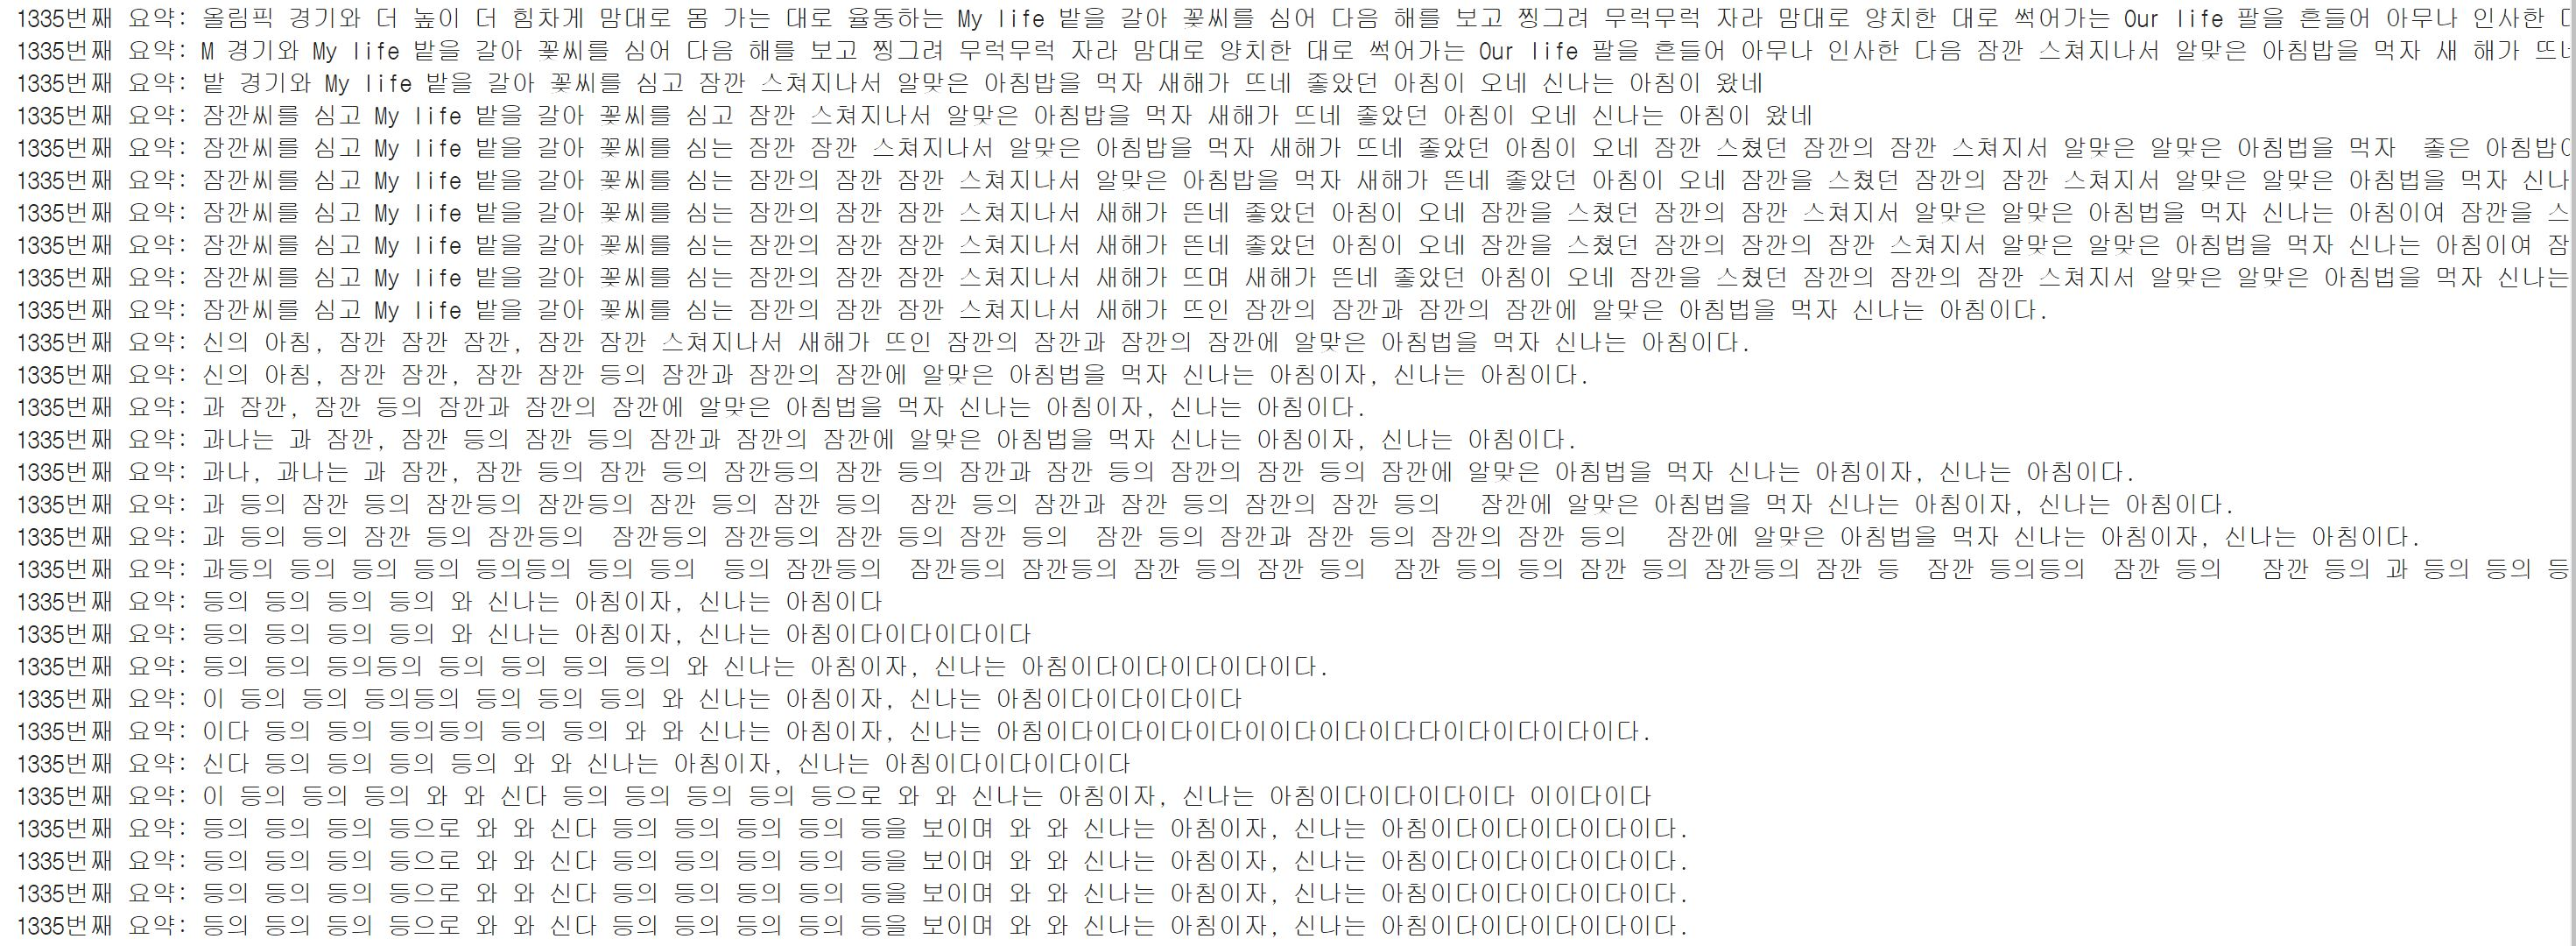